In [1]:
import os
from joblib import load
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import itertools


# Helper functions for data preprocessing and feature extraction
from methods.preprocessing import *
from methods.image_enhancement import *

# Machine Learning models and utilities
from methods.ml import *

# CNN models and utilities
from methods.cnn import *

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score

# 1. Preprocessing

In [2]:
# Read data in folder
test_dir = "/Users/dogukan/Developer/facerecognation/data/fer-2013-dataset/test"
for dirpath,dirname,filenames in os.walk(test_dir):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath[22:]}")

There are 7 directories and 0 images in er/facerecognation/data/fer-2013-dataset/test
There are 0 directories and 1774 images in er/facerecognation/data/fer-2013-dataset/test/happy
There are 0 directories and 1247 images in er/facerecognation/data/fer-2013-dataset/test/sad
There are 0 directories and 1024 images in er/facerecognation/data/fer-2013-dataset/test/fear
There are 0 directories and 831 images in er/facerecognation/data/fer-2013-dataset/test/surprise
There are 0 directories and 1233 images in er/facerecognation/data/fer-2013-dataset/test/neutral
There are 0 directories and 958 images in er/facerecognation/data/fer-2013-dataset/test/angry
There are 0 directories and 111 images in er/facerecognation/data/fer-2013-dataset/test/disgust


In [3]:
data_gen = create_data_gen()
validation_generator = data_gen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical"
)

validation_vgg_generator = data_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical"
)

Found 7178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


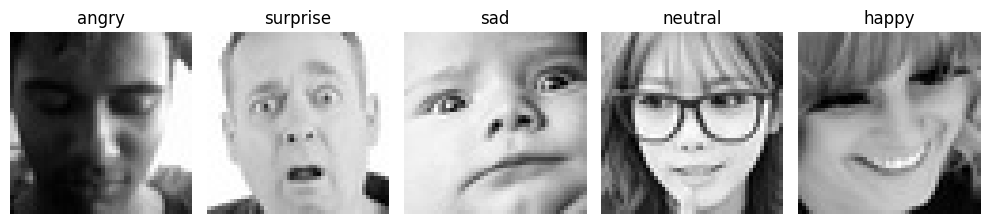

In [31]:
label_map = (validation_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items())

images, labels = next(validation_generator)
plot_example_images(images[:5], labels[:5], label_map)

# 2. ML Models

We will train 3 different ML models and compare them.
- SVM
- KNN
- Random Forest

Improving model accuracy through techniques such as feature matching and cross-validation, which are crucial for assessing the performance of machine learning models like SVM, KNN, and Random Forest in a more robust manner.

In [18]:
# Load test dataset
images_test, labels_test = load_dataset(test_dir)

# Labels NumPy array
y_test = np.array(labels_test)

# Extract SIFT features
sift_features_test = extract_sift_features(images_test)
X_test_sift = np.array(sift_features_test)

# Extract HOG features
hog_features_test = extract_HOG_features(images_test)
X_test_hog = np.array(hog_features_test)

# Combine SIFT and HOG features
combined_features_test = combine_features(sift_features_test, hog_features_test)
X_test_combined = np.array(combined_features_test)

2.1. SVM (Support Vector Machine)

In [ ]:
svm_classifier_sift = load("svm_classifier_sift.joblib")
svm_accuracy_score, svm_pred = svm_classifier_sift.evaluate(X_test_sift, y_test)

# Perform cross-validation
svm_classifier_sift.cross_validation()

In [ ]:
svm_classifier_hog = load("svm_classifier_hog.joblib")
svm_accuracy_score, svm_pred = svm_classifier_hog.evaluate(X_test_hog, y_test)

# Perform cross-validation
svm_classifier_hog.cross_validation()

In [ ]:
svm_classifier_combined = load("svm_classifier_combined.joblib")
svm_accuracy_score, svm_pred = svm_classifier_combined.evaluate(X_test_combined, y_test)

# Perform cross-validation
svm_classifier_combined.cross_validation()

2.2 KNN (K-Nearest Neighbors)

In [19]:
knn_classifier_sift = load("knn_classifier_sift.joblib")
knn_accuracy_score, knn_pred = knn_classifier_sift.evaluate(X_test_sift, y_test)

# Perform cross-validation
knn_classifier_sift.cross_validation()

kNN Accuracy:  0.24115352465867929
Cross Validation Accuracy:  [0.25388601 0.2642487  0.2492228  0.2654225  0.26283048 0.26075687
 0.27008813 0.24831519 0.27008813 0.24883359]


In [20]:
knn_classifier_hog = load("knn_classifier_hog.joblib")
knn_accuracy_score, knn_pred = knn_classifier_hog.evaluate(X_test_hog, y_test)

# Perform cross-validation
knn_classifier_hog.cross_validation()

kNN Accuracy:  0.3938422959041516
Cross Validation Accuracy:  [0.41243523 0.40725389 0.39585492 0.40124417 0.41627786 0.41524106
 0.41886988 0.41524106 0.41213064 0.41316744]


In [21]:
knn_classifier_combined = load("knn_classifier_combined.joblib")
knn_accuracy_score, knn_pred = knn_classifier_combined.evaluate(X_test_combined, y_test)

# Perform cross-validation
knn_classifier_combined.cross_validation()

kNN Accuracy:  0.24129283923098357
Cross Validation Accuracy:  [0.25440415 0.26373057 0.2492228  0.2649041  0.26283048 0.26127527
 0.27164334 0.2503888  0.26853292 0.249352  ]


2.3. Random Forest

In [22]:
rf_classifier_sift = load("rf_classifier_sift.joblib")
rf_accuracy_score, rf_pred = rf_classifier_sift.evaluate(X_test_sift, y_test)

# Perform cross-validation
rf_classifier_sift.cross_validation()

Random Forest Accuracy:  0.3005015324602954
Cross Validation Accuracy:  [0.30984456 0.32176166 0.31813472 0.31000518 0.30585796 0.32141006
 0.31622602 0.31674443 0.31933644 0.31778123]


In [23]:
rf_classifier_hog = load("rf_classifier_hog.joblib")
rf_accuracy_score, rf_pred = rf_classifier_hog.evaluate(X_test_hog, y_test)

# Perform cross-validation
rf_classifier_hog.cross_validation()

Random Forest Accuracy:  0.4488715519643355
Cross Validation Accuracy:  [0.46528497 0.46943005 0.4611399  0.46241576 0.45878694 0.46967341
 0.44738206 0.47641265 0.47278383 0.47433904]


In [24]:
rf_classifier_combined = load("rf_classifier_combined.joblib")
rf_accuracy_score, rf_pred = rf_classifier_combined.evaluate(X_test_combined, y_test)

# Perform cross-validation
rf_classifier_combined.cross_validation()

Random Forest Accuracy:  0.4463638896628587
Cross Validation Accuracy:  [0.47668394 0.46010363 0.4611399  0.45515811 0.46397097 0.45826853
 0.46708139 0.48004147 0.45412131 0.4686366 ]


# 3. CNN Models

In [4]:
cnn_model = load_model("cnn_model.h5")
cnn_model.evaluate(validation_generator)

  1/225 ━━━━━━━━━━━━━━━━━━━━ 35s 158ms/step - accuracy: 0.6250 - loss: 1.2045

/opt/homebrew/Caskroom/miniforge/base/envs/fer/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5357 - loss: 1.2515


[1.2705283164978027, 0.5330175757408142]

In [ ]:
cnn_vgg_model = load_model("cnn_vgg.h5")
cnn_vgg_model.evaluate(validation_vgg_generator)

In [ ]:
cnn_resnet_model = load_model("cnn_resnet.h5")
cnn_resnet_model.evaluate(validation_vgg_generator)

# 4. Performance Measurements